In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [6]:
data = pd.read_csv("Dry_Bean.csv")
data.head(2)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER


In [7]:
#only numeric feature , dropping non.numeric features
features = data.drop('Class',axis=1)
features.head(2)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430


In [8]:
ss = StandardScaler()
features = ss.fit_transform(features)
kmeans = KMeans(n_clusters=7,n_init=10,random_state=42)
kmeans.fit(features)

KMeans(n_clusters=7, n_init=10, random_state=42)

In [9]:
data['Cluster']=kmeans.labels_

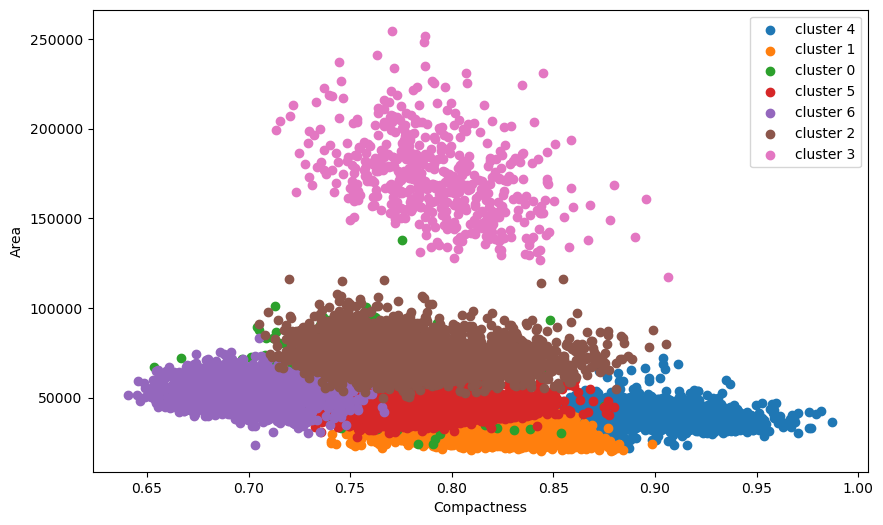

In [22]:
plt.figure(figsize=(10,6))
for cluster in data['Cluster'].unique():
    plt.scatter(data[data['Cluster'] == cluster]['Compactness'],
    data[data['Cluster'] == cluster]['Area'],
    label= f'cluster {cluster}')
plt.legend()
plt.xlabel('Compactness')
plt.ylabel('Area')
plt.show()

In [24]:
#apply pca
pca = PCA(n_components=2)
x_pca=pca.fit_transform(features)
kmeans.fit(x_pca)

KMeans(n_clusters=7, n_init=10, random_state=42)

In [26]:
data['Cluster']=kmeans.labels_
#=[ ] { }

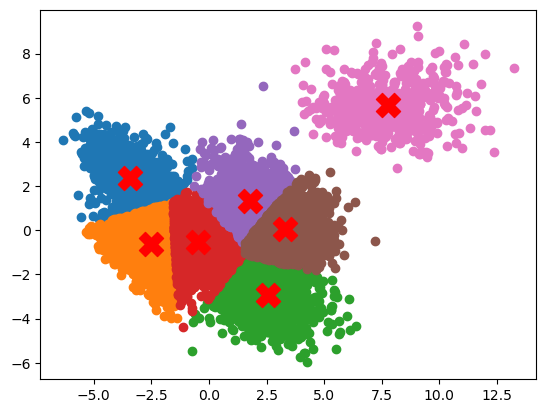

In [34]:
for cluster in data['Cluster'].unique():
    plt.scatter(x_pca[data['Cluster'] == cluster,0],
    x_pca[data['Cluster'] == cluster,1],
    label=f'cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,marker='X',c='red',label='centroids')